# Comparison- UBER and FHV Data

In [1]:
#Import available libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

# Data Collection - Reading files

In [2]:
#Read Uber Data

UBER_apr14 = pd.read_csv('uber-raw-data-apr14.csv')
UBER_may14 = pd.read_csv('uber-raw-data-may14.csv')
UBER_jun14 = pd.read_csv('uber-raw-data-jun14.csv')
UBER_jul14 = pd.read_csv('uber-raw-data-jul14.csv')
UBER_aug14 = pd.read_csv('uber-raw-data-aug14.csv')
UBER_sep14 = pd.read_csv('uber-raw-data-sep14.csv')
UBER_2015_jan_june = pd.read_csv('uber-raw-data-janjune-15.csv')

In [3]:
#Read Other taxi Data

#read csv files 
American_B01362=pd.read_csv('American_B01362.csv')
Dial7_B00887=pd.read_csv('Dial7_B00887.csv')
Federal_02216=pd.read_csv('Federal_02216.csv')
Lyft_B02510=pd.read_csv('Lyft_B02510.csv')
Skyline_B00111=pd.read_csv('Skyline_B00111.csv')

#read xlsx files
Carmel_B00256=pd.read_excel('Carmel_B00256.xlsx')
Diplo_B01196=pd.read_excel('Diplo_B01196.xlsx')
Firstclass_B01536=pd.read_excel('Firstclass_B01536.xlsx')
Highclass_B01717=pd.read_excel('Highclass_B01717.xlsx')
Prestige_B01338=pd.read_excel('Prestige_B01338.xlsx')

In [4]:
#General verification -uber
print('UBER_apr14' , UBER_apr14.head()) 
print('UBER_may14' ,UBER_may14.head())
print( 'UBER_jun14' ,UBER_jun14.head())
print( 'UBER_jul14' ,UBER_jul14.head())
print('UBER_aug14' ,UBER_aug14.head())
print( 'UBER_sep14' ,UBER_sep14.head())
print( 'UBER_2015_jan_june' ,UBER_2015_jan_june.head())

UBER_apr14           Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
UBER_may14           Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512
UBER_jun14           Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512
UBER_jul14           Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.999

In [5]:
#General verification -Other FHV data

print('American_B01362' , American_B01362.head()) 
print('Dial7_B00887' ,Dial7_B00887.head())
print( 'Federal_02216' ,Federal_02216.head())
print( 'Lyft_B02510' ,Lyft_B02510.head())
print('Skyline_B00111' ,Skyline_B00111.head())

print('Carmel_B00256' , Carmel_B00256.head()) 
print('Diplo_B01196' ,Diplo_B01196.head())
print( 'Firstclass_B01536' ,Firstclass_B01536.head())
print( 'Highclass_B01717' ,Highclass_B01717.head())
print('Prestige_B01338' ,Prestige_B01338.head())

American_B01362        DATE         TIME                  PICK UP ADDRESS  Unnamed: 3  \
0  7/1/2014  12:00:00 AM    874 E 139th St Mott Haven, BX         NaN   
1  7/1/2014  12:01:00 AM    628 E 141st St Mott Haven, BX         NaN   
2  7/1/2014  12:01:00 AM   601 E 156th St South Bronx, BX         NaN   
3  7/1/2014  12:01:00 AM    708 E 138th St Mott Haven, BX         NaN   
4  7/1/2014  12:02:00 AM    700 E 140th St Mott Haven, BX         NaN   

   Unnamed: 4  Unnamed: 5  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  
Dial7_B00887          Date   Time                                              State  \
0  2014.07.06  14:30  NY                                            ...   
1  2014.07.04   7:15  NY                                            ...   
2  2014.07.05   5:45  NY                                            ...   
3  2014.07.06   4:30  NY                                        

It is noted that the pick up date for uber and other taxis have different format and the field itself has different names in different files.So the first step in this data analysis is to change all the date time fields into the same format and same name for the data comparison and combining.It will save some time in future analysis.


In [6]:
#Rename the Date column -Pickup for symmetric fields

Dial7_B00887.rename(columns={'Date': 'PickupDatetime'}, inplace=True)
Lyft_B02510.rename(columns={'time_of_trip': 'PickupDatetime'}, inplace=True)
Skyline_B00111.rename(columns={'Date': 'PickupDatetime'}, inplace=True)
American_B01362.rename(columns={'DATE': 'PickupDatetime'}, inplace=True)
Federal_02216.rename(columns={'Date': 'PickupDatetime'}, inplace=True)
Carmel_B00256.rename(columns={'Date': 'PickupDatetime'}, inplace=True)
Diplo_B01196.rename(columns={'Date': 'PickupDatetime'}, inplace=True)
Firstclass_B01536.rename(columns={'DATE': 'PickupDatetime'}, inplace=True)
Highclass_B01717.rename(columns={'DATE': 'PickupDatetime'}, inplace=True)
Prestige_B01338.rename(columns={'DATE': 'PickupDatetime'}, inplace=True)

UBER_2015_jan_june.rename(columns={'Pickup_date ': 'PickupDatetime'}, inplace=True)


### Combine Uber data 

In [7]:

#check the datatypes before the binding-all should be same 

print(str(UBER_apr14))
print(str(UBER_may14))
print(str(UBER_jun14))
print(str(UBER_jul14))
print(str(UBER_aug14))
print(str(UBER_sep14))


#all datframes have the same structure, so we can combine them together

                 Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]
                 Date/Time      Lat      Lon    Base
0         5/1/2014 0:02:00  40.7521 -73.9914  B02512
1         5/1/2014 0:06:00  40.6965 -73.9715  B02512
2         5/1/2014 0:15:00  40.7464 -73.9838  B02512
3         5/1/2014 0:17:00  40.7463 -74.0011  B02512
4         5/1/2014 0:17:00  40.7594 -73.9734  B02512
...                

In [8]:
#Bind 4 months data and make one data frame
uber_data = pd.concat([UBER_apr14, UBER_may14, UBER_jun14, UBER_jul14, UBER_aug14,UBER_sep14])

#check the shape to make sure that all the rows added 
uber_data.shape

#take backup
uber_data_backup=uber_data


In [9]:
#rename the date/time field in the uber data
uber_data.rename(columns={'Date/Time': 'PickupDatetime'}, inplace=True)

#change the column pickupdate to datetime filed
uber_data['PickupDatetime'] = pd.DataFrame(pd.to_datetime(uber_data['PickupDatetime'],format = '%m/%d/%Y %H:%M:%S').dt.date)
#check the result
uber_data.head()

,PickupDatetime,Lat,Lon,Base
0,2014-04-01,40.7690,-73.9549,B02512
1,2014-04-01,40.7267,-74.0345,B02512
2,2014-04-01,40.7316,-73.9873,B02512
3,2014-04-01,40.7588,-73.9776,B02512
4,2014-04-01,40.7594,-73.9722,B02512


In [10]:
#standardise the date format in other taxi data for fast processing of date fields

Dial7_B00887['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Dial7_B00887['PickupDatetime'],format = '%Y.%m.%d ').dt.date)
Lyft_B02510['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Lyft_B02510['PickupDatetime'],format = '%m/%d/%Y %H:%M').dt.date)
Skyline_B00111['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Skyline_B00111['PickupDatetime'],format = '%m/%d/%Y').dt.date)
American_B01362['PickupDatetime'] = pd.DataFrame(pd.to_datetime(American_B01362['PickupDatetime'],format = '%m/%d/%Y').dt.date)
Federal_02216['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Federal_02216['PickupDatetime'],format = '%m/%d/%Y').dt.date)
Carmel_B00256['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Carmel_B00256['PickupDatetime']).dt.date)
Diplo_B01196['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Diplo_B01196['PickupDatetime']).dt.date)
Firstclass_B01536['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Firstclass_B01536['PickupDatetime']).dt.date)
Highclass_B01717['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Highclass_B01717['PickupDatetime']).dt.date)
Prestige_B01338['PickupDatetime'] = pd.DataFrame(pd.to_datetime(Prestige_B01338['PickupDatetime']).dt.date)

In [11]:
#Create a column named taxi service in uber and other FHV services

#uber
uber_data['Taxi_Service'] = 'Uber'
UBER_2015_jan_june['Taxi_Service'] = 'Uber'

#other FHV 
Dial7_B00887['Taxi_Service'] = 'Dial7'
Lyft_B02510['Taxi_Service'] = 'Lyft'
Skyline_B00111['Taxi_Service'] = 'Skyline'
American_B01362['Taxi_Service'] = 'American'
Federal_02216['Taxi_Service'] = 'Federal'
Carmel_B00256['Taxi_Service'] = 'Carmel'
Diplo_B01196['Taxi_Service'] = 'Diplo'
Firstclass_B01536['Taxi_Service'] = 'Firstclass'
Highclass_B01717['Taxi_Service'] = 'Highclass'
Prestige_B01338['Taxi_Service'] = 'Prestige'


In [12]:
#select the columns relevant for analysis

Dial7_B00887_1=Dial7_B00887[['PickupDatetime','Taxi_Service']]
Lyft_B02510_1=Lyft_B02510[['PickupDatetime','Taxi_Service']]
Skyline_B00111_1=Skyline_B00111[['PickupDatetime','Taxi_Service']]
American_B01362_1=American_B01362[['PickupDatetime','Taxi_Service']]
Federal_02216_1=Federal_02216[['PickupDatetime','Taxi_Service']]
Carmel_B00256_1=Carmel_B00256[['PickupDatetime','Taxi_Service']]
Diplo_B01196_1=Diplo_B01196[['PickupDatetime','Taxi_Service']]
Firstclass_B01536_1=Firstclass_B01536[['PickupDatetime','Taxi_Service']]
Highclass_B01717_1=Highclass_B01717[['PickupDatetime','Taxi_Service']]
Prestige_B01338_1=Prestige_B01338[['PickupDatetime','Taxi_Service']]

UBER_2015_jan_june.rename(columns={'Pickup_date': 'PickupDatetime'}, inplace=True)

uber_data=uber_data[['PickupDatetime','Taxi_Service']]
UBER_2015_jan_june=UBER_2015_jan_june[['PickupDatetime','Taxi_Service']]


### Combine other FHV data

In [13]:
#combine all the data from other FHV 
other_taxi_data = pd.concat([Dial7_B00887_1, Lyft_B02510_1, Skyline_B00111_1, American_B01362_1, Federal_02216_1,Carmel_B00256_1,Diplo_B01196_1,Firstclass_B01536_1,Highclass_B01717_1,Prestige_B01338_1])

In [14]:
#check the shape of the data
other_taxi_data.shape

(1676781, 2)

### Combine uber data and other FHV data

In [15]:
#merge all taxi data and do primary checks
NYC_TAXI_data = pd.concat([other_taxi_data,uber_data])

#check the shape and datatypes
print(NYC_TAXI_data.shape)
print(NYC_TAXI_data.dtypes)


(6211108, 2)
PickupDatetime    object
Taxi_Service      object
dtype: object


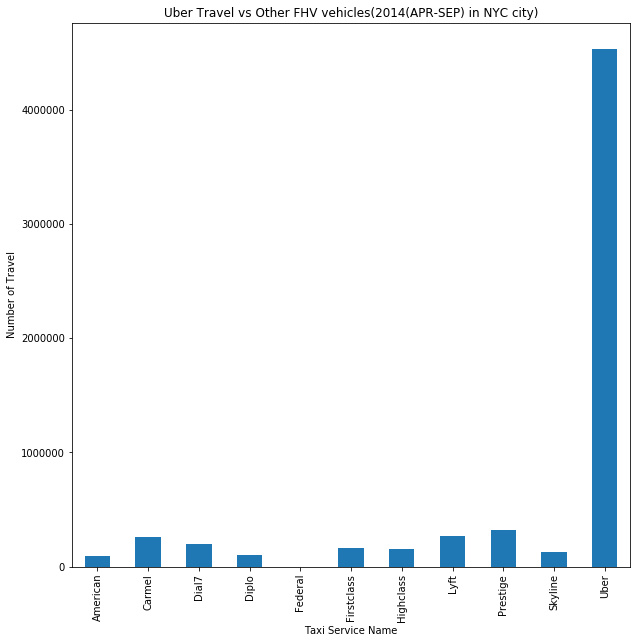

In [16]:
# Uber Business and other taxi analysis in new york city

NYC_TAXI_data.groupby(['Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (10,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Taxi Service Name')
plt.title('Uber Travel vs Other FHV vehicles(2014(APR-SEP) in NYC city)');

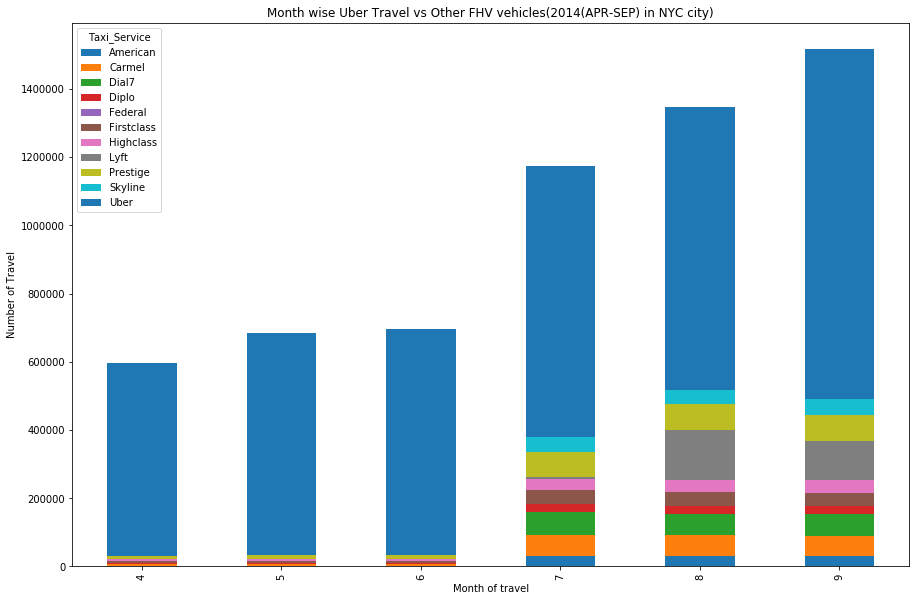

In [52]:

#convert pickup date to date time format
NYC_TAXI_data['PickupDatetime'] = pd.to_datetime(NYC_TAXI_data['PickupDatetime'])

#create month field and filter unwanted data(data is between apriland september 2014)
NYC_TAXI_data['month'] = NYC_TAXI_data['PickupDatetime'].dt.month
NYC_TAXI_data = NYC_TAXI_data[(NYC_TAXI_data['month']>3) & (NYC_TAXI_data['month']<10)]

NYC_TAXI_data.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('Month wise Uber Travel vs Other FHV vehicles(2014(APR-SEP) in NYC city)');

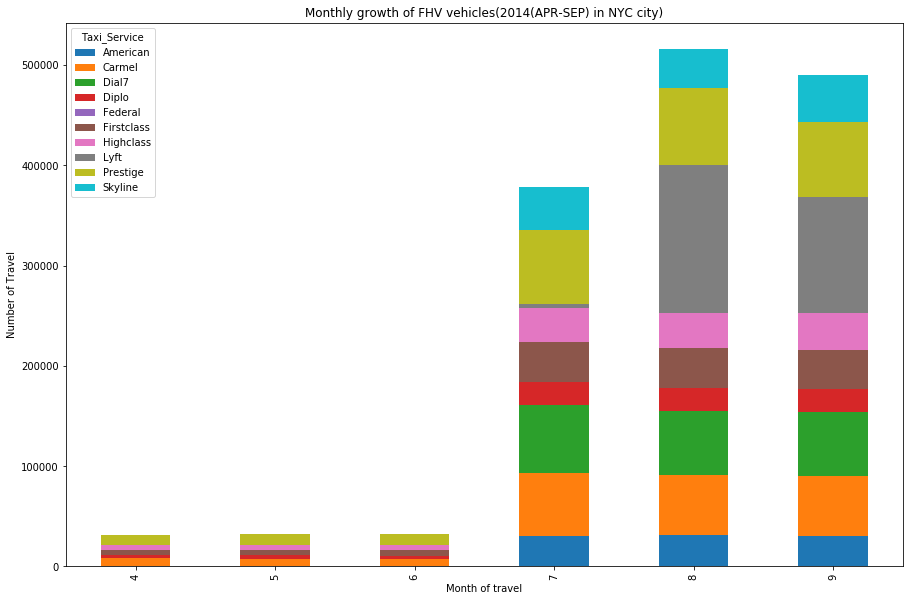

In [53]:
#convert pickup date to date time format
other_taxi_data['PickupDatetime'] = pd.to_datetime(other_taxi_data['PickupDatetime'])

#create month field and filter unwanted data(data is between apriland september 2014)
other_taxi_data['month'] = other_taxi_data['PickupDatetime'].dt.month
other_taxi_data = other_taxi_data[(other_taxi_data['month']>3) & (other_taxi_data['month']<10)]

other_taxi_data.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('Monthly growth of FHV vehicles(2014(APR-SEP) in NYC city)');

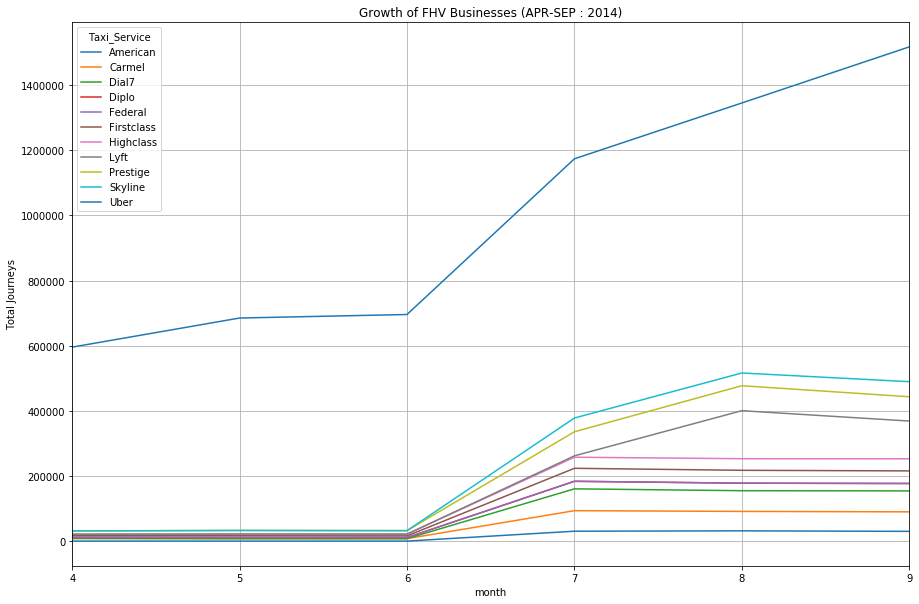

In [54]:
 #Individual Growth of Company Businesses in 2014
    
NYC_TAXI_data.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(figsize = (15,10),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of FHV Businesses (APR-SEP : 2014)');
plt.grid()

# Uber did not seem to hurt the business of other companies in 2014
# as all other companies experienced a growth in their business along with Uber

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


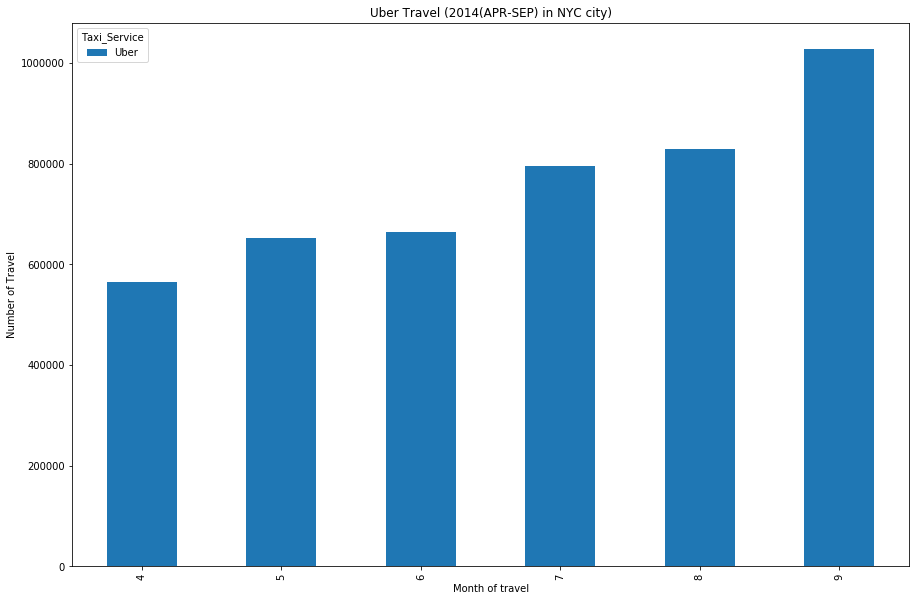

In [20]:
#convert pickup date to date time format
uber_data['PickupDatetime'] = pd.to_datetime(uber_data['PickupDatetime'])

#create month field and filter unwanted data(data is between april and september 2014)
uber_data['month'] = uber_data['PickupDatetime'].dt.month
uber_data = uber_data[(uber_data['month']>3) & (uber_data['month']<10)]

uber_data.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('Uber Travel (2014(APR-SEP) in NYC city)');

In [21]:
    uber_data['PickupDatetime'] = pd.to_datetime(uber_data['PickupDatetime'])
    
    uber_data['date'] = uber_data['PickupDatetime'].dt.date
    uber_data['month'] = uber_data['PickupDatetime'].dt.month
    uber_data['week'] = uber_data['PickupDatetime'].dt.week
    uber_data['MonthDayNum'] = uber_data['PickupDatetime'].dt.day
    uber_data['DayOfWeekNum'] = uber_data['PickupDatetime'].dt.dayofweek
    uber_data['DayOfWeek'] = uber_data['PickupDatetime'].dt.weekday_name
    
    other_taxi_data['PickupDatetime'] = pd.to_datetime(other_taxi_data['PickupDatetime'])
        
    other_taxi_data['date'] = other_taxi_data['PickupDatetime'].dt.date
    other_taxi_data['month'] = other_taxi_data['PickupDatetime'].dt.month
    other_taxi_data['week'] = other_taxi_data['PickupDatetime'].dt.week
    other_taxi_data['MonthDayNum'] = other_taxi_data['PickupDatetime'].dt.day
    other_taxi_data['DayOfWeekNum'] = other_taxi_data['PickupDatetime'].dt.dayofweek
    other_taxi_data['DayOfWeek'] = other_taxi_data['PickupDatetime'].dt.weekday_name

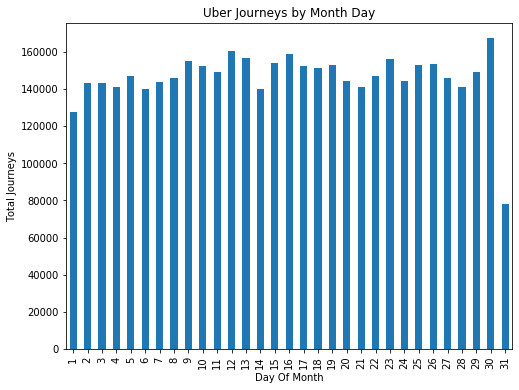

In [56]:
uber_data.groupby('MonthDayNum').count()['Taxi_Service'].plot(kind='bar', figsize = (8,6))
plt.ylabel('Total Journeys')
plt.xlabel('Day Of Month')
plt.title('Uber Journeys by Month Day');

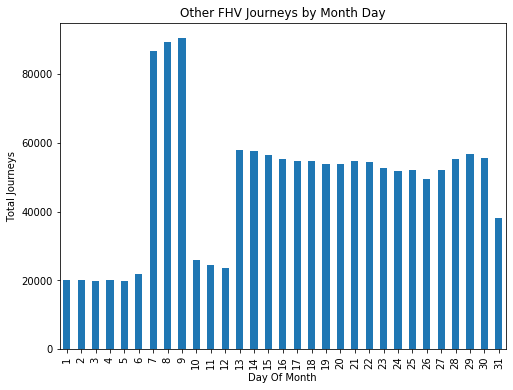

In [57]:
other_taxi_data.groupby('MonthDayNum').count()['Taxi_Service'].plot(kind='bar', figsize = (8,6))
plt.ylabel('Total Journeys')
plt.xlabel('Day Of Month')
plt.title('Other FHV Journeys by Month Day');

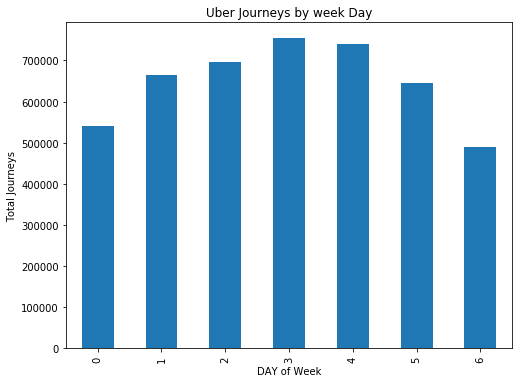

In [58]:
uber_data.groupby('DayOfWeekNum').count()['Taxi_Service'].plot(kind='bar', figsize = (8,6))
plt.ylabel('Total Journeys')
plt.xlabel('DAY of Week')
plt.title('Uber Journeys by week Day');

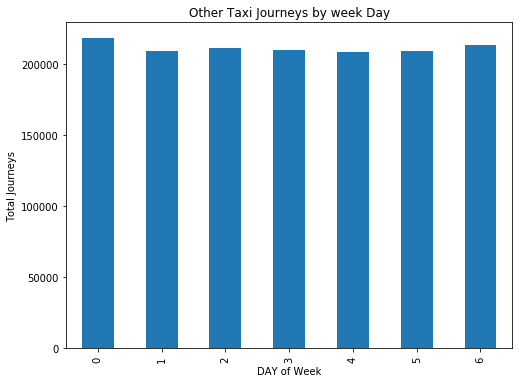

In [60]:
other_taxi_data.groupby('DayOfWeekNum').count()['Taxi_Service'].plot(kind='bar', figsize = (8,6))
plt.ylabel('Total Journeys')
plt.xlabel('DAY of Week')
plt.title('Other Taxi Journeys by week Day');

In [26]:
NYC_TAXI_data['DayOfWeekNum'] = NYC_TAXI_data['PickupDatetime'].dt.dayofweek


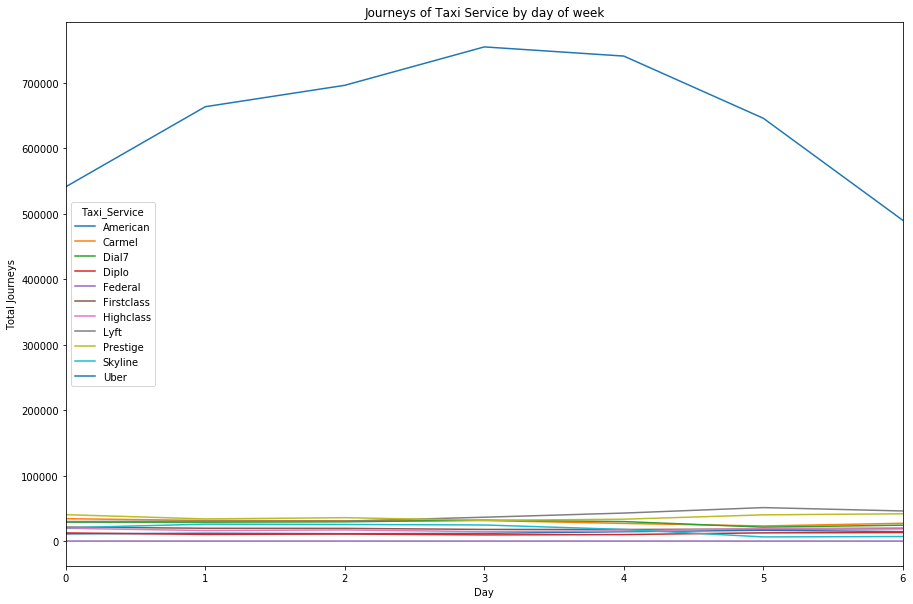

In [62]:
#Taxi service growth by week day 
NYC_TAXI_data.groupby(['DayOfWeekNum','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(figsize = (15,10))
plt.ylabel('Total Journeys')
plt.xlabel('Day')
plt.title('Journeys of Taxi Service by day of week');


In [28]:
NYC_TAXI_data['week/Weekend'] = False

NYC_TAXI_data.loc[NYC_TAXI_data.DayOfWeekNum>=5,'week/Weekend'] = False
NYC_TAXI_data.loc[NYC_TAXI_data.DayOfWeekNum<5,'week/Weekend'] = True

uber_data.loc[uber_data.DayOfWeekNum>=5,'week/Weekend'] = False
uber_data.loc[uber_data.DayOfWeekNum<5,'week/Weekend'] = True

other_taxi_data.loc[other_taxi_data.DayOfWeekNum>=5,'week/Weekend'] = False
other_taxi_data.loc[other_taxi_data.DayOfWeekNum<5,'week/Weekend'] = True

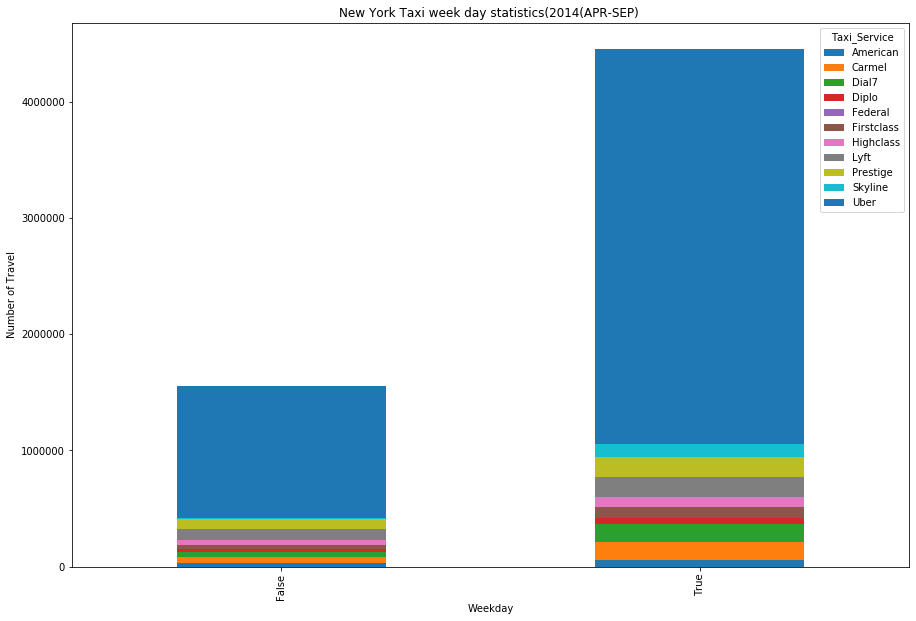

In [64]:
#weekday/weekend statistics 

NYC_TAXI_data.groupby(['week/Weekend','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Weekday')
plt.title('New York Taxi week day statistics(2014(APR-SEP) ');

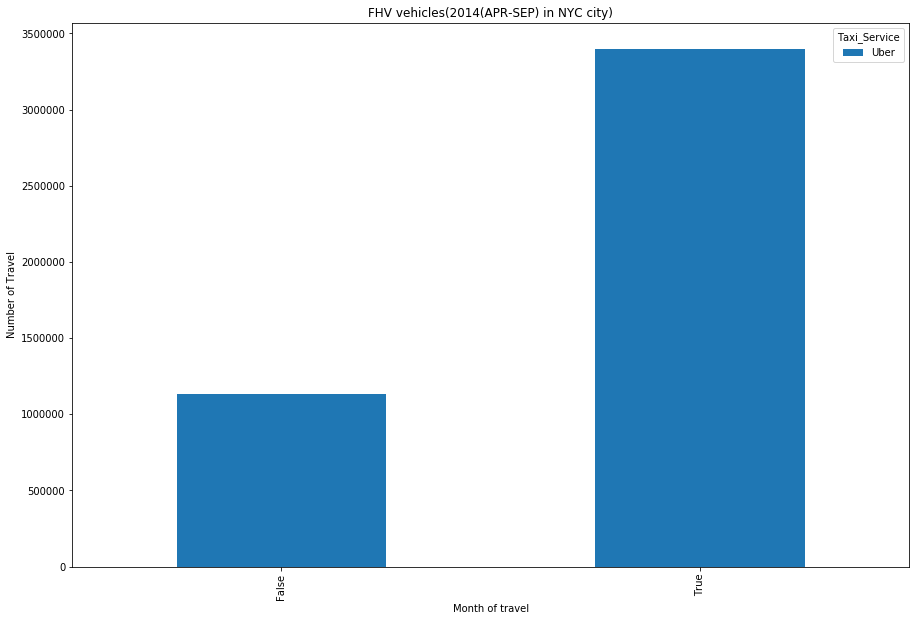

In [30]:
uber_data.groupby(['week/Weekend','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('FHV vehicles(2014(APR-SEP) in NYC city)');

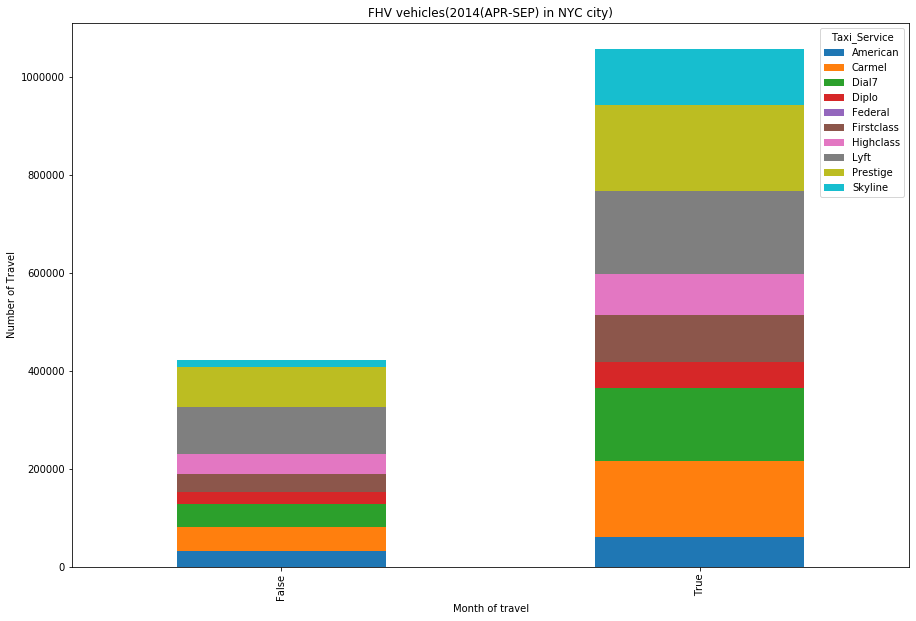

In [31]:
other_taxi_data.groupby(['week/Weekend','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('FHV vehicles(2014(APR-SEP) in NYC city)');

In [32]:
positions <- data.frame(lon=uber_data_backup, uber_data_backup=df$Lat)

SyntaxError: invalid syntax (<ipython-input-32-1883f96f0e56>, line 1)

In [ ]:
uber_data_backup.dtypes

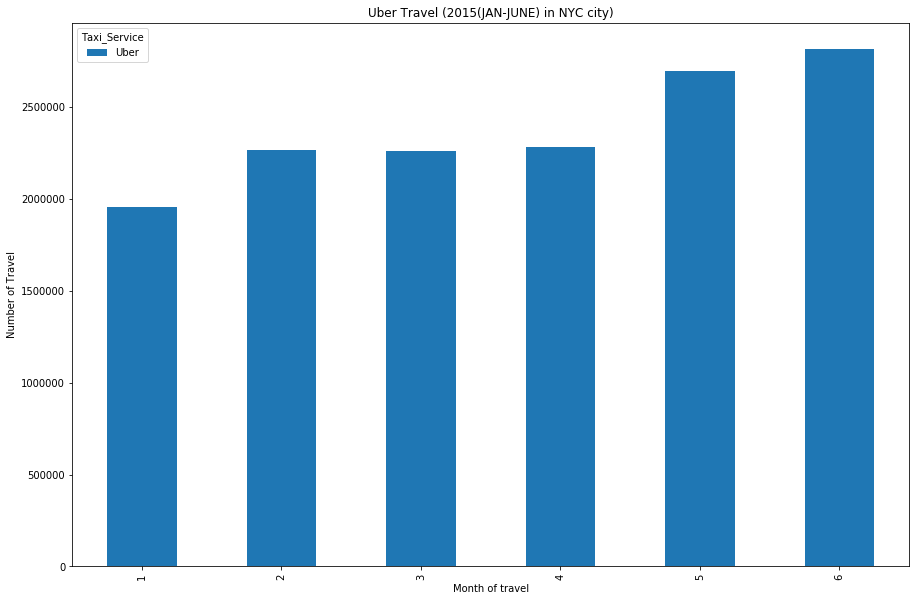

In [67]:
#convert pickup date to date time format
UBER_2015_jan_june['PickupDatetime'] = pd.to_datetime(UBER_2015_jan_june['PickupDatetime'])

#create month field and filter unwanted data(data is between april and september 2014)
UBER_2015_jan_june['month'] = UBER_2015_jan_june['PickupDatetime'].dt.month
#UBER_2015_jan_june = UBER_2015_jan_june[(UBER_2015_jan_june['month']>0) & (uber_data['month']<7)]

UBER_2015_jan_june.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(kind='bar', figsize = (15,10),stacked=True)
plt.ylabel('Number of Travel')
plt.xlabel('Month of travel')
plt.title('Uber Travel (2015(JAN-JUNE) in NYC city)');

In [ ]:
UBER_2015_jan_june.head()

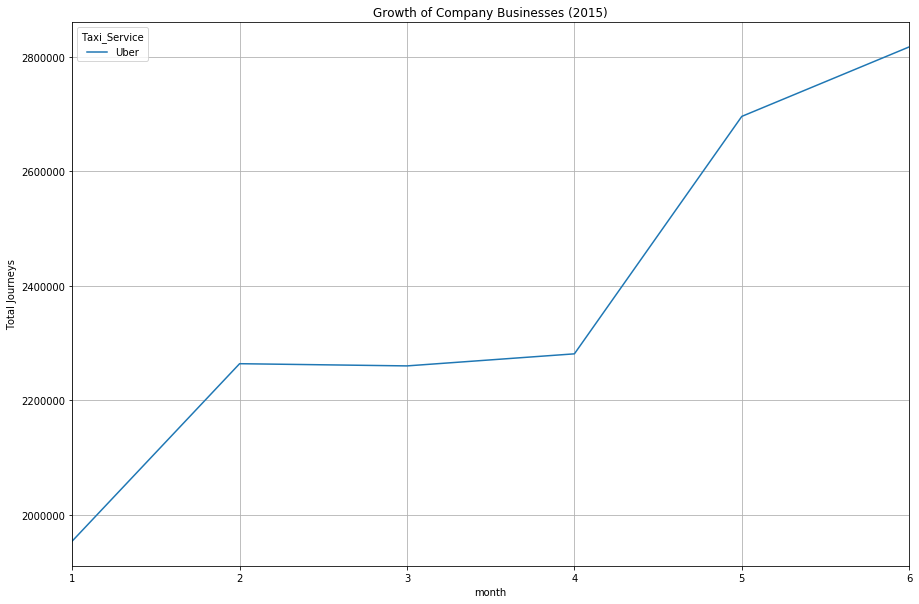

In [68]:
 #Individual Growth of Company Businesses in 2015
    
UBER_2015_jan_june.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(figsize = (15,10),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of Company Businesses (2015)');
plt.grid()


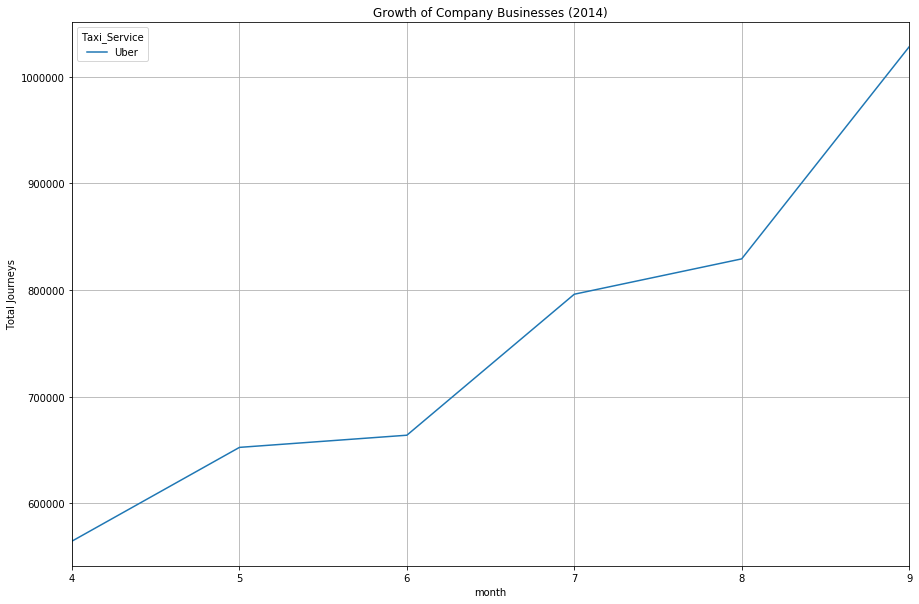

In [69]:
 #Individual Growth of Company Businesses in 2014

uber_data['PickupDatetime'] = pd.to_datetime(uber_data['PickupDatetime'])
uber_data['month'] = uber_data['PickupDatetime'].dt.month

    
uber_data.groupby(['month','Taxi_Service']).count().unstack('Taxi_Service')['PickupDatetime'].plot(figsize = (15,10),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of Company Businesses (2014)');
plt.grid()



In [71]:
AggregateFHVData=pd.read_excel('Aggregate FHV Data.xlsx')
AggregateFHVData.shape

(92, 13)

In [72]:
AggregateFHVData_1=AggregateFHVData[['Date','Uber','Yellow Taxis','Green Taxis']]
AggregateFHVData_1['month'] = AggregateFHVData_1['Date'].dt.month

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


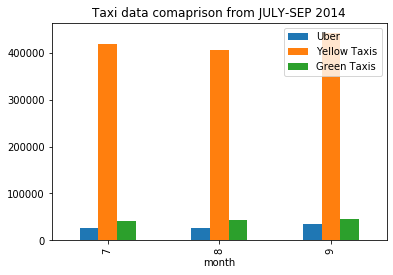

In [73]:
#Competitors of Uber
y= AggregateFHVData_1.set_index('month')
z=y.groupby('month').mean()
z.plot.bar(stacked=False,title="Taxi data comaprison from JULY-SEP 2014")

### Clustering Uber details to enhance  Uber Business in NYC city 

In [33]:
#take the relevant data fields for clustering algorithm 
cluster=uber_data_backup[['Lat','Lon']]

In [34]:
#import necessary libraries

# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
#transform data
mms = MinMaxScaler()
mms.fit(cluster)
data_transformed = mms.transform(cluster)

In [36]:
#Optimum value of K

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

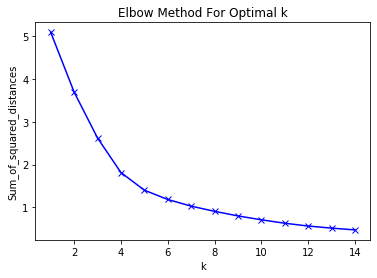

In [37]:
#Elbow method to find optimal value of K 

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
#perform kmeans
km = KMeans(n_clusters=5,max_iter=200,random_state=111)
km.fit(cluster[0:750000])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [39]:
#print the cluster center co-ordinates
print(km.cluster_centers_)

[[ 40.76317395 -73.97565024]
 [ 40.66077836 -73.77532178]
 [ 40.79822769 -73.87235133]
 [ 40.71972119 -73.99233214]
 [ 40.70076096 -74.2026252 ]]


In [40]:
#store centroids
centroids=km.cluster_centers_

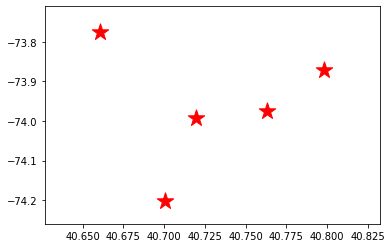

In [41]:
#plot the centers


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red',marker='*')
plt.show()

In [51]:

import folium

# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[ 40.76317395 ,-73.97565024], zoom_start = 10)
folium.Marker(location=[ 40.76317395 ,-73.97565024], popup = [ 40.76317395 ,-73.97565024]).add_to(map)
folium.Marker(location=[40.66077836 ,-73.77532178], popup = [40.66077836 ,-73.77532178]).add_to(map)
folium.Marker(location=[40.79822769 ,-73.87235133], popup = [40.79822769 ,-73.87235133]).add_to(map)
folium.Marker(location=[40.71972119 ,-73.99233214], popup = [40.71972119 ,-73.99233214]).add_to(map)
folium.Marker(location=[40.70076096 ,-74.2026252], popup = [40.70076096 ,-74.2026252]).add_to(map)
map


In [47]:
#find out the cluster labels
cluster_labels = km.labels_
#store it as data frame 
cluster_labels=pd.DataFrame(cluster_labels)
uber_data_backup['CLUSTER']=cluster_labels

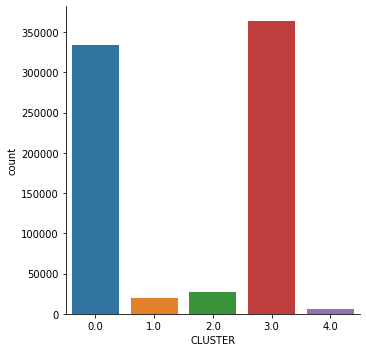

In [49]:
#plot the clusters back to data
import seaborn as sb
sb.factorplot(data=uber_data_backup[0:750000],x='CLUSTER',kind='count')